# <u> NACEP </u>
## 2015-16 CRDC
## AP v. DE Flag Analysis
#### Alijah O'Connor - 2018
------------------------------------------------------------------------------------
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)

from my_functions.extra_functions import flag_grouper

%matplotlib inline
sns.set_style('whitegrid')
plt.rc('axes', titlesize = 14, titleweight = 'bold', labelweight = 'bold')

In [2]:
hs = pd.read_csv('../filtered_data/04_filter_final.csv', dtype = {'LEAID':np.object})

In [3]:
hs.columns.values

array(['COMBOKEY', 'SCH_NAME', 'GSHI', 'GSLO', 'JJ', 'LAT1516', 'LEAID',
       'LEA_NAME', 'LEA_STATE', 'LEA_STATE_NAME', 'LEVEL', 'LOCALE15',
       'LON1516', 'NMCNTY15', 'SCHID', 'SCH_APENR_AM_F', 'SCH_APENR_AM_M',
       'SCH_APENR_AS_F', 'SCH_APENR_AS_M', 'SCH_APENR_BL_F',
       'SCH_APENR_BL_M', 'SCH_APENR_HI_F', 'SCH_APENR_HI_M',
       'SCH_APENR_HP_F', 'SCH_APENR_HP_M', 'SCH_APENR_IDEA_F',
       'SCH_APENR_IDEA_M', 'SCH_APENR_IND', 'SCH_APENR_LEP_F',
       'SCH_APENR_LEP_M', 'SCH_APENR_TR_F', 'SCH_APENR_TR_M',
       'SCH_APENR_WH_F', 'SCH_APENR_WH_M', 'SCH_DUALENR_AM_F',
       'SCH_DUALENR_AM_M', 'SCH_DUALENR_AS_F', 'SCH_DUALENR_AS_M',
       'SCH_DUALENR_BL_F', 'SCH_DUALENR_BL_M', 'SCH_DUALENR_HI_F',
       'SCH_DUALENR_HI_M', 'SCH_DUALENR_HP_F', 'SCH_DUALENR_HP_M',
       'SCH_DUALENR_IDEA_F', 'SCH_DUALENR_IDEA_M', 'SCH_DUALENR_LEP_F',
       'SCH_DUALENR_LEP_M', 'SCH_DUALENR_TR_F', 'SCH_DUALENR_TR_M',
       'SCH_DUALENR_WH_F', 'SCH_DUALENR_WH_M', 'SCH_DUAL_IND',
    

# National

### -- Overall Breakdowns

<div class = 'alert alert-cell alert-info'>**All DE**</div>

In [4]:
de_breakdown = hs.groupby(['SCH_DUAL_IND'])['LEAID'].count()
print(de_breakdown)
print("")
de_pct = round(de_breakdown.iloc[1] / (de_breakdown.iloc[0] + de_breakdown.iloc[1]), 3)
print(str(de_pct) + " percent of schools in this dataset reported that they offered dual enrollment in 2013-2014.")

SCH_DUAL_IND
No      5337
Yes    13330
Name: LEAID, dtype: int64

0.714 percent of schools in this dataset reported that they offered dual enrollment in 2013-2014.


<div class = 'alert alert-cell alert-info'>**All AP**</div>

In [5]:
ap_breakdown = hs.groupby(['SCH_APENR_IND'])['LEAID'].count()
print(ap_breakdown)
print("")
ap_pct = round(ap_breakdown.iloc[1] / (ap_breakdown.iloc[0] + ap_breakdown.iloc[1]), 3)
print(str(ap_pct) + " percent of schools in this dataset reported that they offered AP in 2013-2014.")

SCH_APENR_IND
No      5911
Yes    12756
Name: LEAID, dtype: int64

0.683 percent of schools in this dataset reported that they offered AP in 2013-2014.


## - By Size
(Based on Total Enrollment of School)

<div class = 'alert alert-cell alert-danger'>**Create a Size-of-School Classifier**</div>

In [6]:
hs['total_enrollment'] = hs['TOT_ENR_M'] + hs['TOT_ENR_F']
from my_functions.extra_functions import hs_enrollment_averager
hs['hs_total_enrollment'] = hs_enrollment_averager(hs) # Calculating HS Students from the Total_Enrollments in Schools

In [7]:
"""Assigning Size Groups based on HS Enrollments"""
from my_functions.extra_functions import school_sizer
hs['size_group'] = hs['hs_total_enrollment'].apply(lambda x: school_sizer(x))

In [8]:
de_by_size = flag_grouper(hs, 'size_group', 'DE')
ap_by_size = flag_grouper(hs, 'size_group', 'AP')

hs_by_size = pd.merge(de_by_size, ap_by_size, on = '# of HS Schools')
hs_by_size = hs_by_size.rename({0: '<100', 1: '100-499', 2:'500-1199', 3:'1200+'})
hs_by_size.index.names = ['Student Enrollment']
hs_by_size

,# of HS Schools,# of DE Schools,DE Offering Rate,# of AP Schools,AP Offering Rate
Student Enrollment,,,,,
<100,2358,1331,56.4,333,14.1
100-499,7390,5225,70.7,4100,55.5
500-1199,4543,3409,75.0,4035,88.8
1200+,4376,3365,76.9,4288,98.0


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>

(0, 100)

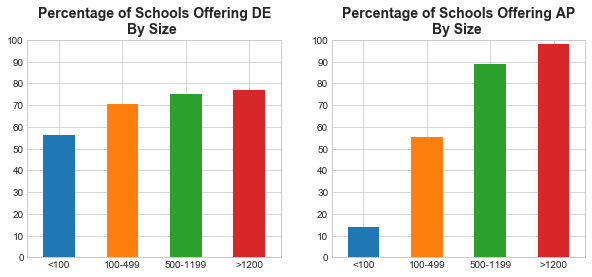

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))

plt.sca(ax1)
hs_by_size.plot.bar(y = 'DE Offering Rate', ax = ax1)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('Percentage of Schools Offering DE\nBy Size ')
plt.yticks(np.arange(0,110,10))
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylim([0,100])

plt.sca(ax2)
hs_by_size.plot.bar(y = 'AP Offering Rate', ax=ax2)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('Percentage of Schools Offering AP\nBy Size ')
plt.yticks(np.arange(0,110, 10))
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylim([0,100])

## - By Locale

<div class = 'alert alert-cell alert-danger'>**Creating a Locale Classifer**</div>

In [10]:
from my_functions.extra_functions import locale_map
hs['locale_group'] = hs['LOCALE15'].map(locale_map)
hs.locale_group.value_counts()

Rural       7438
Suburban    4481
City        4109
Town        2639
Name: locale_group, dtype: int64

In [11]:
de_by_locale = flag_grouper(hs, 'locale_group', 'DE')
ap_by_locale = flag_grouper(hs, 'locale_group', 'AP')

hs_by_locale = pd.merge(de_by_locale, ap_by_locale, on = '# of HS Schools')
hs_by_locale = hs_by_locale.rename({0: 'City', 1: 'Rural', 2: 'Suburban', 3: 'Town'})
hs_by_locale.index.names = ['Locale']
hs_by_locale

,# of HS Schools,# of DE Schools,DE Offering Rate,# of AP Schools,AP Offering Rate
Locale,,,,,
City,4109,2301,56.0,3152,76.7
Rural,7438,5853,78.7,3827,51.5
Suburban,4481,3126,69.8,3925,87.6
Town,2639,2050,77.7,1852,70.2


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>

(0, 100)

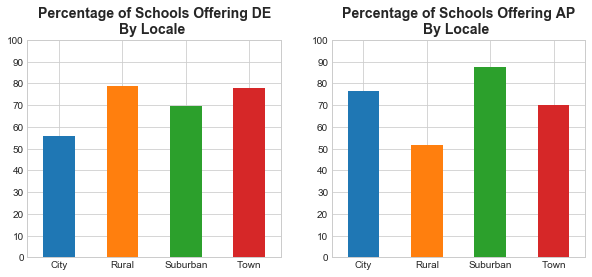

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))

plt.sca(ax1)
hs_by_locale.plot.bar(y = 'DE Offering Rate', ax = ax1)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('Percentage of Schools Offering DE\nBy Locale ')
plt.yticks(np.arange(0,110,10))
# plt.xticks([0,1,2,3], [''])
plt.ylim([0,100])

plt.sca(ax2)
hs_by_locale.plot.bar(y = 'AP Offering Rate', ax=ax2)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('Percentage of Schools Offering AP\nBy Locale ')
plt.yticks(np.arange(0,110, 10))
# plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylim([0,100])

# - By Ethnicity Quintiles

<div class = 'alert alert-cell alert-danger'>**Calculate the percent ethnicity of all schools in the set and group schools into quintiles**</div>

In [13]:
hs['pct_eth'] = (hs['total_enrollment'] - hs['SCH_ENR_WH_F'] - hs['SCH_ENR_WH_M']) / hs['total_enrollment']
from my_functions.extra_functions import eth_grouper
hs['eth_quintile'] = hs['pct_eth'].apply(lambda pct: eth_grouper(pct))

Text(0.5,0,'Ethnicity Percentage')

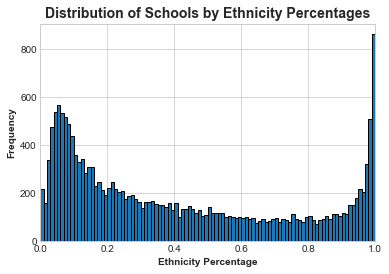

In [14]:
"""What does the distribution of the schools in the dataset look based on ethncitiy?"""
hs.pct_eth.plot.hist(bins=100, xlim = [0,1], edgecolor = 'k')
plt.title('Distribution of Schools by Ethnicity Percentages')
plt.xlabel('Ethnicity Percentage')
# plt.savefig(fname = './Visualizations/By_ethnicity_dist_200.png', dpi = 200)

In [15]:
de_by_eth = flag_grouper(hs, 'eth_quintile', 'DE')
ap_by_eth = flag_grouper(hs, 'eth_quintile', 'AP')

hs_by_eth = pd.merge(de_by_eth, ap_by_eth, on = '# of HS Schools')
hs_by_eth = hs_by_eth.rename({0: '0-20%', 1: '21-40%', 2: '41-60%', 3: '61-80%', 4: '81-100%'})
hs_by_eth.index.names = ['Non-White %']
hs_by_eth

,# of HS Schools,# of DE Schools,DE Offering Rate,# of AP Schools,AP Offering Rate
Non-White %,,,,,
0-20%,7122,5677,79.7,4385,61.6
21-40%,3502,2684,76.6,2493,71.2
41-60%,2414,1755,72.7,1828,75.7
61-80%,1824,1193,65.4,1367,74.9
81-100%,3805,2021,53.1,2683,70.5


<div class = 'alert alert-cell alert-danger'>**Visualization**</div>

Text(0.5,0,'')

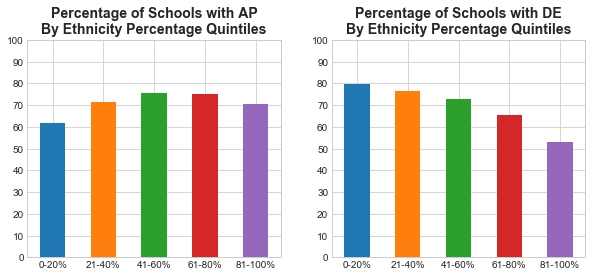

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
plt.sca(ax1)
hs_by_eth.plot.bar(y = 'AP Offering Rate', ax = ax1)
plt.legend([])
plt.title('Percentage of Schools with AP\nBy Ethnicity Percentage Quintiles')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,110,10))
plt.ylim([0,100])
plt.xlabel('')

plt.sca(ax2)
hs_by_eth.plot.bar(y = 'DE Offering Rate', ax = ax2)
plt.legend([])
plt.title('Percentage of Schools with DE\nBy Ethnicity Percentage Quintiles')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,110,10))
plt.ylim([0,100])
plt.xlabel('')

<div class = 'alert alert-cell alert-info'>**Ethnicity Exploration**</div>

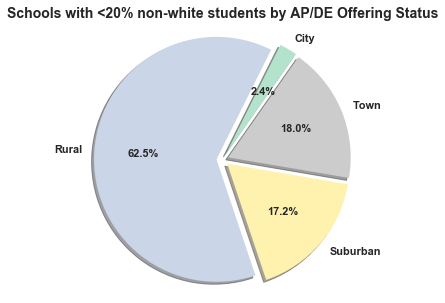

In [17]:
"""Very high percentage non-minority schools by Locale"""
eth_group1_locales = hs[hs.eth_quintile == 1].groupby('locale_group')['LEAID'].count().reset_index()
eth_group1_locales['pct'] = round(eth_group1_locales['LEAID'] / eth_group1_locales['LEAID'].sum() * 100, 1)
eth_group1_locales = eth_group1_locales.set_index('locale_group')

with plt.rc_context({'lines.linewidth': 5, 'font.weight':'bold', 'font.size':11}):
    eth_group1_locales.plot.pie(y='LEAID',autopct='%1.1f%%', 
                            startangle = 55, shadow = True, explode = [.05 for i in range(4)],
                            colormap='Pastel2', figsize = (5,5))
    plt.title('Schools with <20% non-white students by AP/DE Offering Status')
    plt.legend([])
    plt.ylabel('')
    plt.xticks(fontdict={'fontweight':'bold'})
    plt.axis('equal')

# - By Vocational Status

In [18]:
de_by_voc = flag_grouper(hs, 'SCH_TYPE', 'DE')
ap_by_voc = flag_grouper(hs, 'SCH_TYPE', 'AP')

hs_by_voc = pd.merge(de_by_voc, ap_by_voc, on = '# of HS Schools')
hs_by_voc = hs_by_voc.rename({0: 'Regular', 1: 'Vocational'})
hs_by_voc.index.names = ['School Type']
hs_by_voc

,# of HS Schools,# of DE Schools,DE Offering Rate,# of AP Schools,AP Offering Rate
School Type,,,,,
Regular,18308,13124,71.7,12639,69.0
Vocational,359,206,57.4,117,32.6


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>

Text(0.5,0,'')

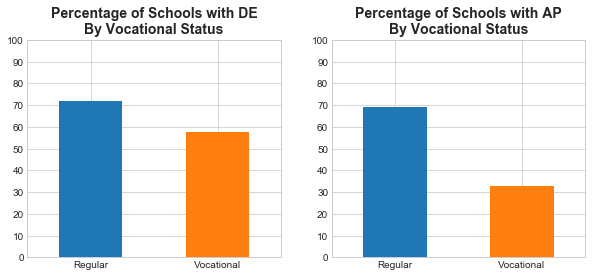

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
plt.sca(ax1)
hs_by_voc.plot.bar(y = 'DE Offering Rate', ax = ax1)
plt.legend([])
plt.title('Percentage of Schools with DE\nBy Vocational Status')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,110,10))
plt.ylim([0,100])
plt.xlabel('')

plt.sca(ax2)
hs_by_voc.plot.bar(y = 'AP Offering Rate', ax = ax2)
plt.legend([])
plt.title('Percentage of Schools with AP\nBy Vocational Status')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,110,10))
plt.ylim([0,100])
plt.xlabel('')

# - ScatterGeo

In [20]:
de_map = {'Yes':1, 'No':0}
dual_enroll_bin = hs.SCH_DUAL_IND.map(de_map)

In [21]:
# scl = [ [0,"rgb(5, 10, 172)"], [1,"rgb(0, 200, 100)"] ]


# data = [ dict(
#         type = 'scattergeo',
#         locationmode = 'USA-states',
#         lon = hs['LON1516'],
#         lat = hs['LAT1516'],
#         mode = 'markers',
#         marker = dict(
#             size = 5,
#             opacity = 0.8,
#             autocolorscale = False,
#             line = dict(
#                 width=1,
#                 color='rgba(255,255,255,1)'
#             ),
#             colorscale = scl,
#             cmin = 0,
#             color = dual_enroll_bin,
#             cmax = 1,
#         ))]

# layout = dict(
#         geo = dict(
#             scope='usa',
#             projection=dict( type='albers usa' ),
            
#         ),
#     )

# fig = dict( data=data, layout=layout )
# # fig = go.Figure(data = [data], layout = layout)
# iplot(fig, image = 'png', filename = '02_ScatterGeo_DE_1516', image_width = 2750, image_height=2500)

print("To see the scattergeo, uncomment code and change the size of the markers (to 3-5) -- Very cumbersome Graph")

To see the scattergeo, uncomment code and change the size of the markers (to 3-5) -- Very cumbersome Graph


# By State

<div class = 'alert alert-cell alert-info'>**DE**</div>

In [39]:
de_by_state = flag_grouper(hs, 'LEA_STATE', 'DE', True)
ap_by_state = flag_grouper(hs, 'LEA_STATE', 'AP')

hs_by_state = pd.merge(de_by_state, ap_by_state, on = '# of HS Schools')
hs_by_state = hs_by_state.set_index('LEA_STATE')
hs_by_state.index.names = ['State']
hs_by_state

,# of HS Schools,# of DE Schools,DE Offering Rate,# of AP Schools,AP Offering Rate
State,,,,,
AK,243,97,39.9,42,17.3
AL,353,298,84.4,226,64.0
AR,273,210,76.9,255,93.4
AZ,402,180,44.8,191,47.5
CA,1432,488,34.1,1163,81.2
CO,360,288,80.0,230,63.9
CT,206,132,64.1,171,83.0
DC,29,6,20.7,28,96.6
DE,36,25,69.4,30,83.3


In [25]:
de_data = dict(type = 'choropleth',
            locations = de_by_state['LEA_STATE'],
            locationmode = 'USA-states',
            colorscale = [[0.0, 'rgb(255,255,255)'], [.2, 'rgb(255,221,221)'], [.4, 'rgb(255, 200, 200)'], [0.8, 'rgb(255, 50, 50)'], [1.0, 'rgb(180,0,0)']],
            reversescale = False,
            z = de_by_state['pct'])
de_layout = dict(title = '2015-2016 DE-Offered Percentages',
              geo = {'scope':'usa'})
de_choromap = go.Figure(data = [de_data], layout = de_layout)

iplot(de_choromap)
# iplot(de_choromap, image = 'png', filename='./Visualizations/by_state_de_choropleth')

In [28]:
ap_data = dict(type = 'choropleth',
            locations = ap_by_state['LEA_STATE'],
            locationmode = 'USA-states',
            colorscale = [[0.0, 'rgb(255,255,255)'], [.2, 'rgb(255,221,221)'], [.4, 'rgb(255, 200, 200)'], [0.8, 'rgb(255, 50, 50)'], [1.0, 'rgb(180,0,0)']],
            reversescale = False,
            z = ap_by_state['pct'])
ap_layout = dict(title = '2015-2016 AP-Offered Percentages',
              geo = {'scope':'usa'})
ap_choromap = go.Figure(data = [ap_data], layout = ap_layout)

iplot(ap_choromap)
# iplot(ap_choromap, image = 'png', filename='./Visualizations/by_state_ap_choropleth')

# By Region

<div class = 'alert alert-cell alert-danger'>**Create a Region Classifer based on Region Accreditation**</div>

In [29]:
"""
1:  Middle States Commission on Higher Education - New York, New Jersey, Pennsylvania, Delaware, Maryland, the District of Columbia

2:  New England Association of Schools and Colleges - Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont

3:  Higher Learning Commission - Arkansas, Arizona, Colorado, Iowa, Illinois, Indiana, Kansas, Michigan, Minnesota, Missouri, 
    North Dakota, Nebraska, New Mexico, Ohio, Oklahoma, South Dakota, Wisconsin, West Virginia, and Wyoming

4:  Northwest Commission on Colleges and Universities - Alaska, Idaho, Montana, Nevada, Oregon, Utah, and Washington

5:  Southern Association of Colleges and Schools - Alabama, Florida, Georgia, Kentucky, Louisiana, Mississippi, 
    North Carolina, South Carolina, Tennessee, Texas and Virginia

6:  Western Association of Schools and Colleges - California, Hawaii
"""

from my_functions.extra_functions import region_mapper
hs['region_accred'] = hs['LEA_STATE'].apply(lambda x: region_mapper(x))

In [30]:
de_by_region_accred = hs.groupby(['region_accred', 'SCH_DUAL_IND'])['LEA_STATE'].count().unstack('SCH_DUAL_IND').reset_index()
de_by_region_accred['Total Schools'] = (de_by_region_accred['Yes'] + de_by_region_accred['No'])
de_by_region_accred['pct_de'] = round(de_by_region_accred['Yes'] / (de_by_region_accred['Yes'] + de_by_region_accred['No']), 2)
display(de_by_region_accred.drop(['No'], axis = 1))

%store de_by_region_accred

SCH_DUAL_IND,region_accred,Yes,Total Schools,pct_de
0,HLC,5596,7156,0.78
1,MSCHE,1452,2590,0.56
2,NEASC,506,884,0.57
3,NWCCU,924,1468,0.63
4,SACS,4307,5074,0.85
5,WASC,545,1495,0.36


Stored 'de_by_region_accred' (DataFrame)


<div class = 'alert alert-cell alert-warning'>**AP**</div>

In [31]:
ap_by_region_accred = hs.groupby(['region_accred', 'SCH_APENR_IND'])['LEA_STATE'].count().unstack().reset_index()
ap_by_region_accred['Total Schools'] = (ap_by_region_accred['Yes'] + ap_by_region_accred['No'])
ap_by_region_accred['pct_ap'] = round(ap_by_region_accred['Yes'] / (ap_by_region_accred['Yes'] + ap_by_region_accred['No']), 2)
display(ap_by_region_accred.drop(['No'], axis = 1))

%store ap_by_region_accred

SCH_APENR_IND,region_accred,Yes,Total Schools,pct_ap
0,HLC,4085,7156,0.57
1,MSCHE,2133,2590,0.82
2,NEASC,736,884,0.83
3,NWCCU,765,1468,0.52
4,SACS,3832,5074,0.76
5,WASC,1205,1495,0.81


Stored 'ap_by_region_accred' (DataFrame)


<div class = 'alert alert-cell alert-danger'>**Visualizations**</div>


Text(0.5,0,'')

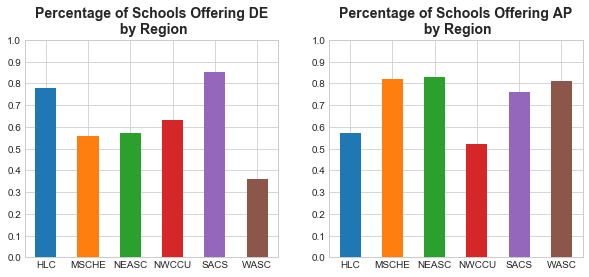

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))

plt.sca(ax1)
de_by_region_accred.plot.bar(x = 'region_accred', y = 'pct_de', ax=ax1)
plt.title('Percentage of Schools Offering DE\n by Region')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')

plt.sca(ax2)
ap_by_region_accred.plot.bar(x = 'region_accred', y = 'pct_ap', ax=ax2)
plt.title('Percentage of Schools Offering AP\n by Region')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,1.1,0.1))
plt.ylim([0,1])
plt.xlabel('')